In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv('Books_Data_Clean.csv')

In [26]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [27]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [28]:
# Cleaning the publishing year feature to start from 1900
df = df[df['Publishing Year'] > 1900]

In [30]:
#Dropping the rows where book name is null
df = df.dropna(subset=['Book Name'])

In [31]:
# Checking for null values in every column
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,0
Author,0
language_code,47
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [33]:
#Checking for any duplicated rows
df.duplicated().sum()

0

In [34]:
# Checking unique rows
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


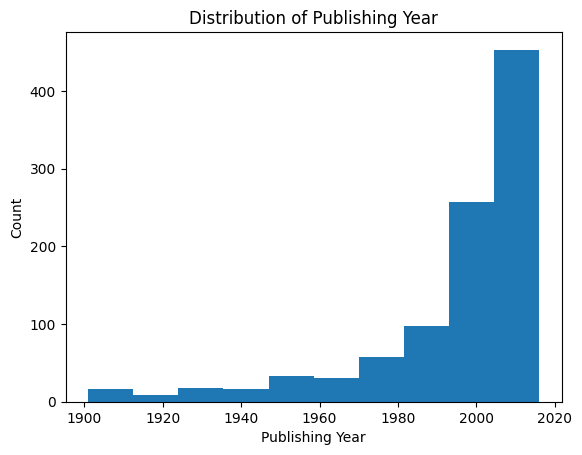

In [35]:
# Checking the distribution of the publishing year
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing Year')
plt.ylabel('Count')
plt.title('Distribution of Publishing Year')
plt.show()

## Observation

We can infer that the publishing year distribution is right skewed. We can also see that there are high number of books published after 2000

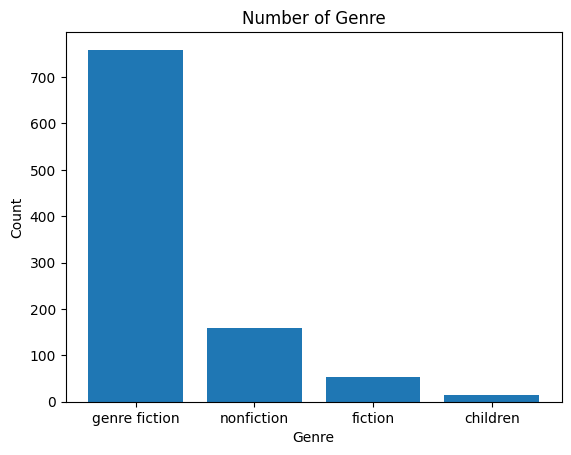

In [38]:
# Checking the number of genre
plt.bar(df['genre'].value_counts().index, df['genre'].value_counts().values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Genre')
plt.show()

## Observations
1. Fiction genere has the highest number of books <br>
2. The children books are less in number

In [41]:

# Calculate the average rating for each author
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False).reset_index()

,Author,Book_average_rating
0,Bill Watterson,4.650000
1,"Bill Watterson, G.B. Trudeau",4.610000
2,J.R.R. Tolkien,4.590000
3,George R.R. Martin,4.560000
4,Sarah J. Maas,4.526000
...,...,...
664,Chetan Bhagat,3.273333
665,Audrey Niffenegger,3.230000
666,"Herman Koch, Sam Garrett",3.220000
667,P.D. James,3.210000


## Observation

Bill Watterson is the author who has the highest average rating

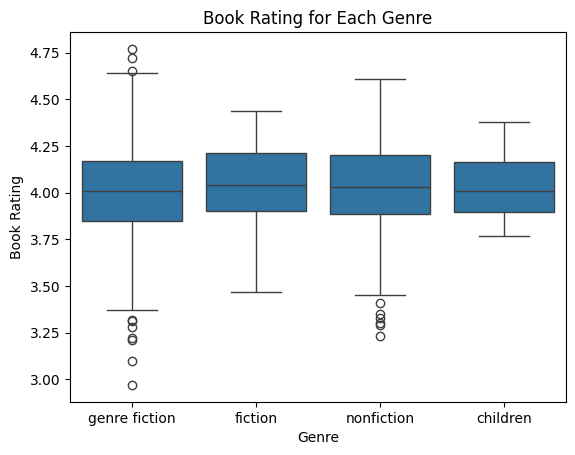

In [42]:
# Analyzing book rating for each genre

sns.boxplot(x='genre', y='Book_average_rating', data=df)
plt.xlabel('Genre')
plt.ylabel('Book Rating')
plt.title('Book Rating for Each Genre')
plt.show()

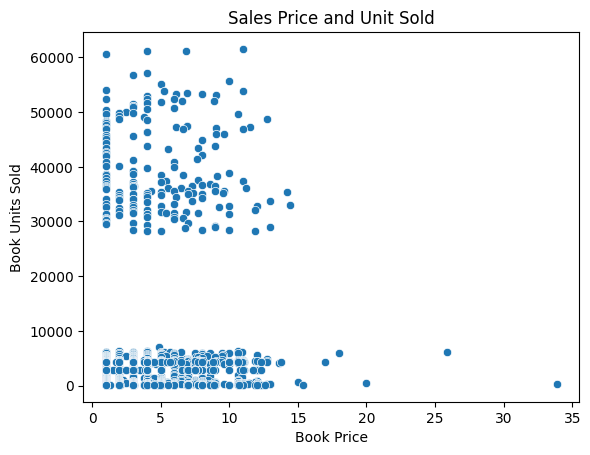

In [44]:
# Analyzing sales price and unit sold
sns.scatterplot(x='sale price', y='units sold', data=df)
plt.xlabel('Book Price')
plt.ylabel('Book Units Sold')
plt.title('Sales Price and Unit Sold')
plt.show()

## Observation

We can infer that high number of books are sold if the unit price is lesser

In [47]:
# Finding the number of books in each language code
df['language_code'].value_counts().sort_values(ascending=True)

,count
language_code,
nl,1
spa,2
ara,2
fre,4
en-CA,7
en-GB,29
en-US,226
eng,670


([<matplotlib.patches.Wedge at 0x7afab9533690>,
 [Text(-0.7126157777780971, 0.8379610690609187, 'eng'),
  Text(0.6267620591129532, -0.9039741817422061, 'en-US'),
  Text(1.0946688293889206, -0.10816724996176144, 'en-GB')],
 [Text(-0.3886995151516893, 0.45706967403322835, '72.43%'),
  Text(0.34187021406161083, -0.49307682640483963, '24.43%'),
  Text(0.597092088757593, -0.05900031816096078, '3.14%')])

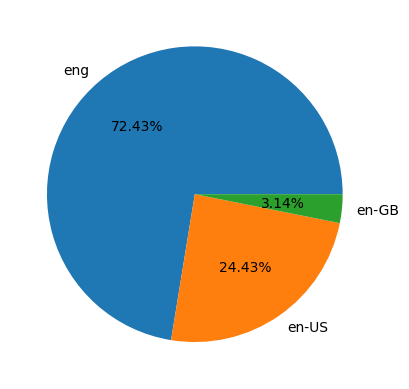

In [50]:
# Visualizing the book count in each language code
lang_names = df['language_code'].value_counts().index
lang_values = df['language_code'].value_counts().values
plt.pie(lang_values[:3], labels = lang_names[:3], autopct='%1.2f%%')

## Observation

The language code - eng tops all the other codes and has the highest count

In [52]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [56]:
# Analyzing the highest revenue generating publisher
df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending=False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


## Observation

1. The highest revenue generating publisher is - Penguin Group (USA) LLC <br>
2. The lowest is HarperCollins Christian Publishing

In [57]:
# Understanding the author rating and the book rating count

df.groupby('Author_Rating')['Book_ratings_count'].mean().sort_values(ascending=False)

,Book_ratings_count
Author_Rating,
Intermediate,101400.272569
Famous,98295.250000
Novice,87318.464286
Excellent,83804.800595


## Observation

1. The Intermediate authors has highest average of book rating counts
2. The excellent authors has the least number of average book rating counts

In [58]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

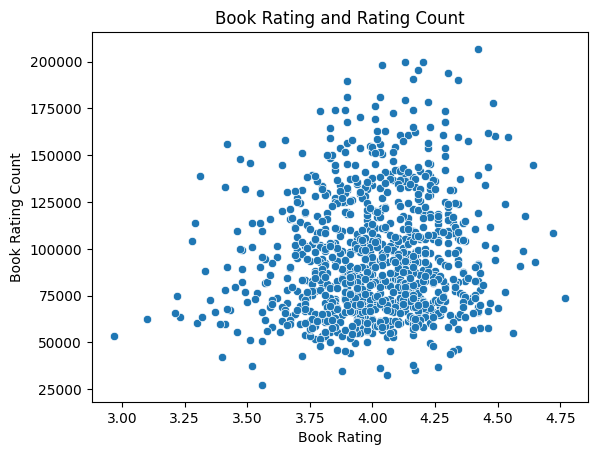

In [59]:
# Analyzing the book rating count for the book average rating
sns.scatterplot(x='Book_average_rating', y='Book_ratings_count', data=df)
plt.xlabel('Book Rating')
plt.ylabel('Book Rating Count')
plt.title('Book Rating and Rating Count')
plt.show()

## Observation

This scatterplot indicates that the book rating is not affected by the number of ratings received for the books. Yet, the datapoints depicts high rating books are highly likely to have increased book rating counts

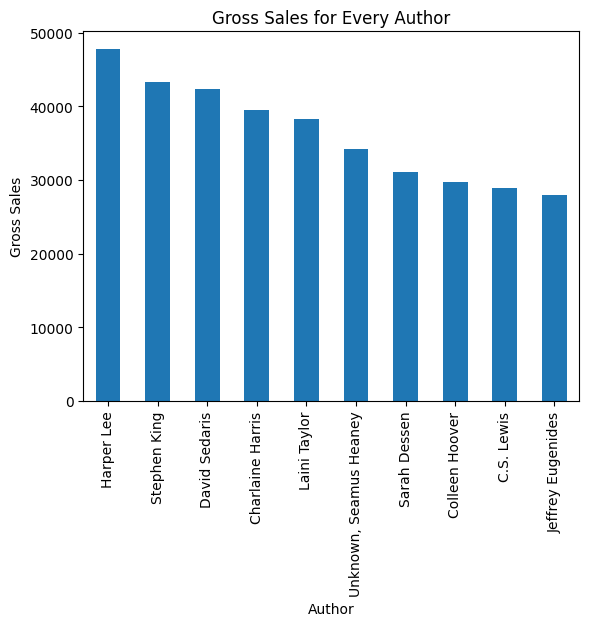

In [63]:
# Analyzing gross sales for every author and identifying top 10 high revenue authors

df.groupby('Author')['gross sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Gross Sales')
plt.title('Gross Sales for Every Author')
plt.show()

## Observation

Harper Lee has the highest revenue amongst all the authors

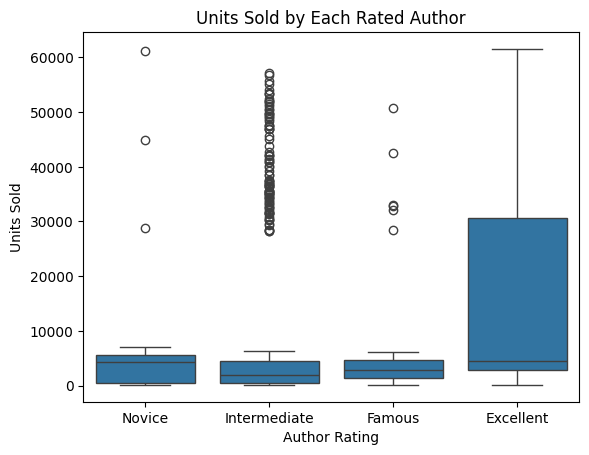

In [66]:
# Units sold by each rated author

sns.boxplot(x='Author_Rating', y='units sold', data=df)
plt.xlabel('Author Rating')
plt.ylabel('Units Sold')
plt.title('Units Sold by Each Rated Author')
plt.show()


## Observation

We can observe that the excellent author books are sold largely

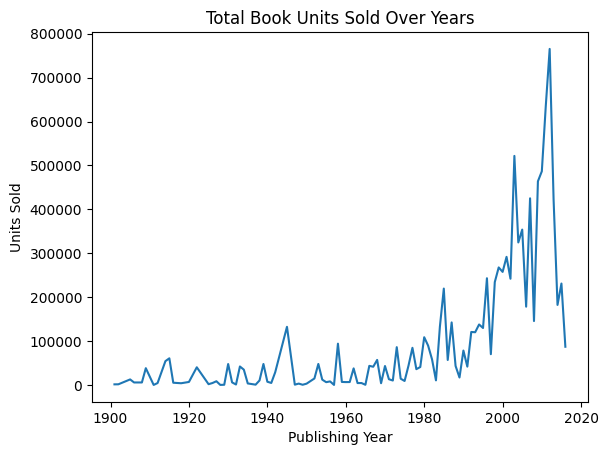

In [69]:
# Total book units sold over years

df.groupby('Publishing Year')['units sold'].sum().plot(kind='line')
plt.xlabel('Publishing Year')
plt.ylabel('Units Sold')
plt.title('Total Book Units Sold Over Years')
plt.show()